<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment-18/blob/main/forcast_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data .csv to Airlines+Data .csv


In [ ]:
airline=pd.read_csv("Airlines+Data .csv")
airline.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


**Converting the 'Month' column into proper date time format**

In [ ]:
dates=pd.date_range(start='Jan-95', freq='MS',periods=len(airline))
dates

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [ ]:
airline['Month']=dates.month
airline['Year'] = dates.year

In [ ]:
airline.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


**To get the names of the month**

In [ ]:
airline.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [ ]:
airline.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


In [ ]:
import calendar

In [ ]:
airline['Month'] = airline['Month'].apply(lambda x: calendar.month_abbr[x])

airline = airline[['Month','Year','Passengers']]

In [ ]:
airline.head()

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121


In [ ]:
airline['Date'] = dates
airline.set_index('Date',inplace=True)
airline.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


# **EDA**

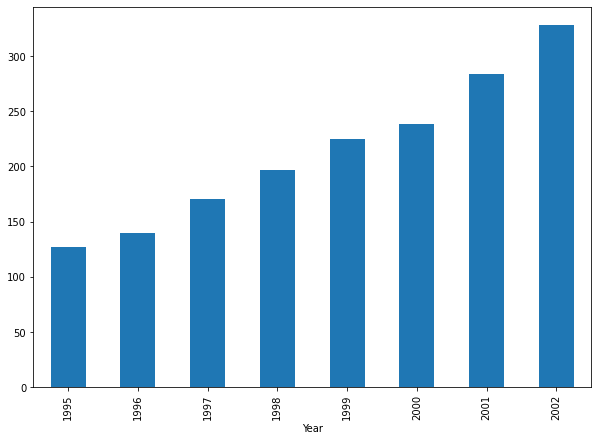

In [ ]:
plt.figure(figsize=(10,7))
airline.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

In [ ]:
print('From the above figure we can see that passengers are increasing with the increase in the year')

From the above figure we can see that passengers are increasing with the increase in the year


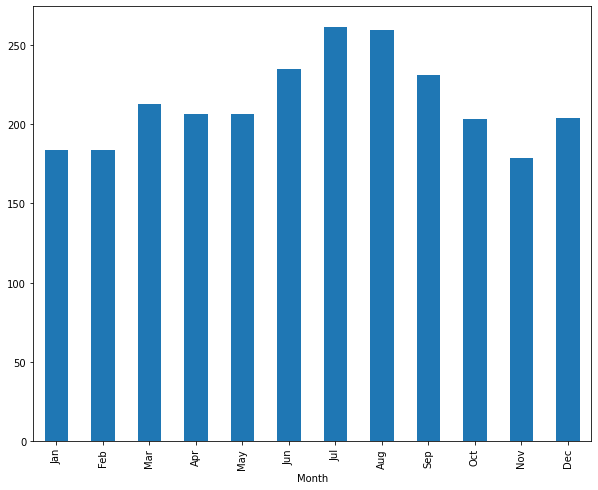

In [ ]:
plt.figure(figsize=(10,8))
airline.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

In [ ]:
print('From the above figure we can see that more passengers can be seen between months June to September.')

From the above figure we can see that more passengers can be seen between months June to September.


**Lets plot the data to see the trend and seasonality**

In [ ]:
airline_counts=airline['Passengers']

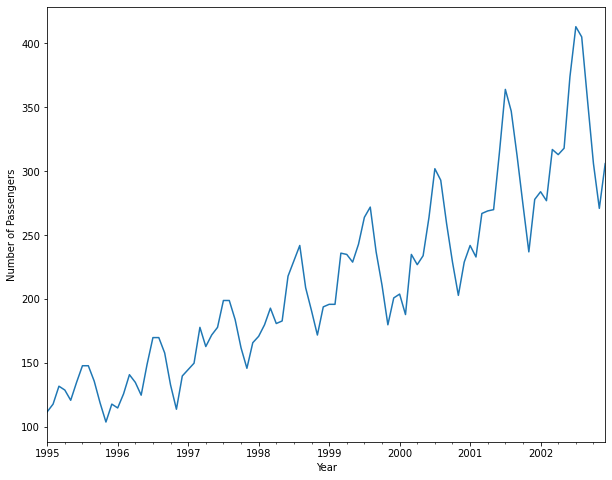

In [ ]:
plt.figure(figsize=(10,8))
airline_counts.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()


**Now we start with time series decomposition of this data to understand underlying patterns such as trend, seasonality, cycle and irregular remainder**

In [ ]:
decompose=sm.tsa.seasonal_decompose(airline_counts,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

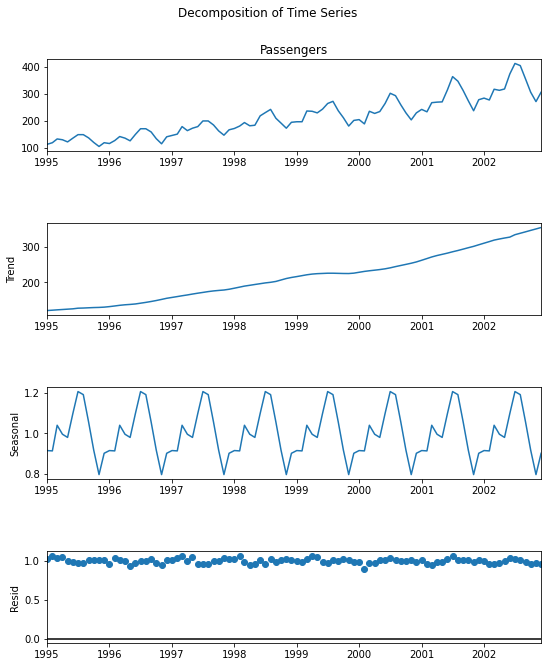

In [ ]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

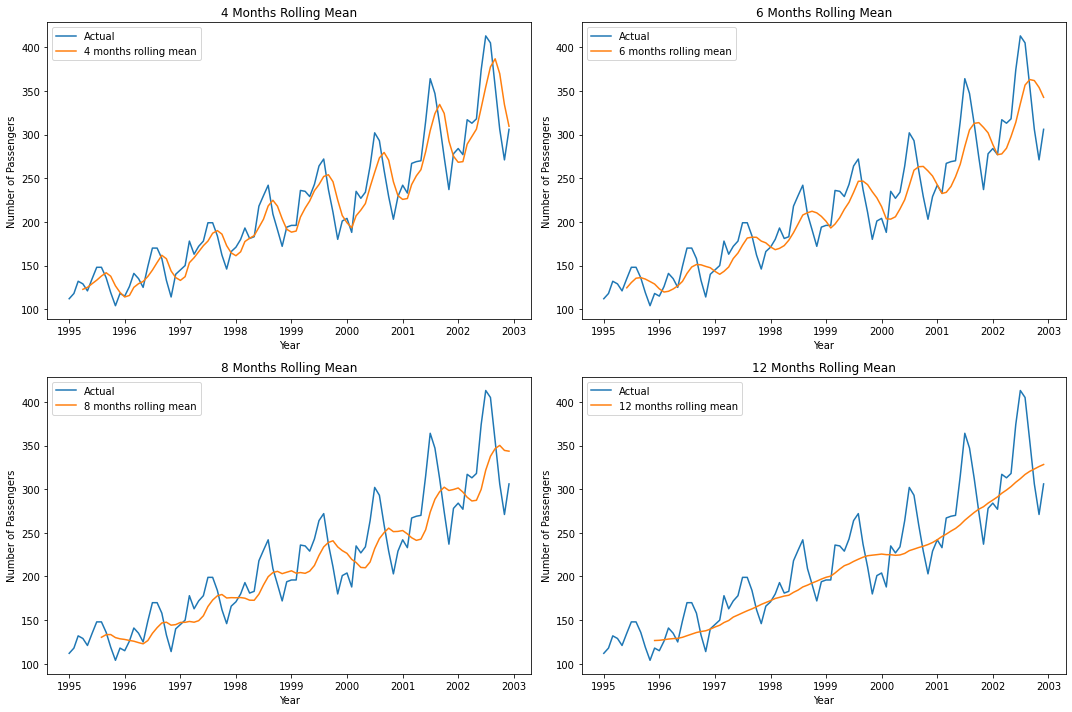

In [ ]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(airline.index,airline_counts,label='Actual')
axes[0][0].plot(airline.index,airline_counts.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(airline.index,airline_counts,label='Actual')
axes[0][1].plot(airline.index,airline_counts.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(airline.index,airline_counts,label='Actual')
axes[1][0].plot(airline.index,airline_counts.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(airline.index,airline_counts,label='Actual')
axes[1][1].plot(airline.index,airline_counts.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()


# **Seasonality**

In [ ]:
airline.head()

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


In [ ]:
monthly = pd.pivot_table(data=airline,values='Passengers', index='Month', columns='Year')
monthly=monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


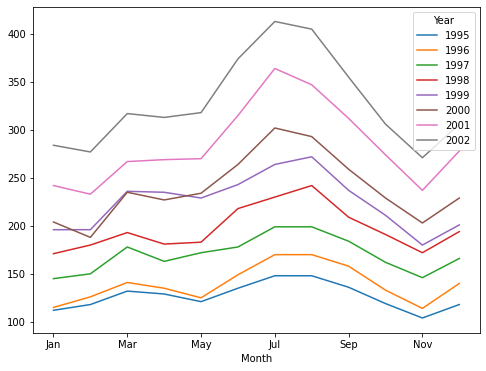

In [ ]:
monthly.plot(figsize=(8,6))
plt.show()

In [ ]:
yearly = pd.pivot_table(data=airline,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


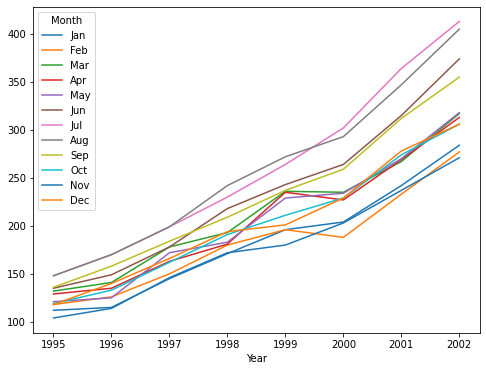

In [ ]:
yearly.plot(figsize=(8,6))
plt.show()

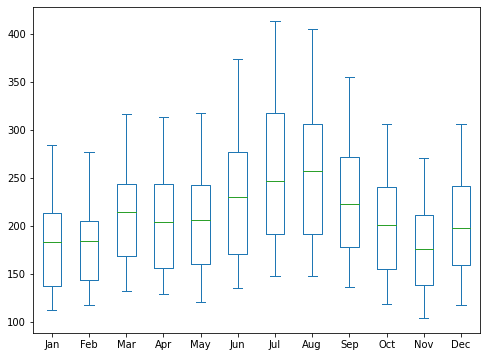

In [ ]:
yearly.plot(kind='box', figsize=(8,6))
plt.show()

Important Inferences The passengers are increasing without fail every year.

July and August are the peak months for passengers.

We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

# **ARIMA Modelling**

**Dickey-Fuller Test**

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(airline_counts)

(1.3402479596467076,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [ ]:
adfuller_results = pd.Series(adfuller(airline_counts)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(airline_counts)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    1.340248
p-value                    0.996825
lags used                 12.000000
Number of observations    83.000000
Critical Value 1%         -3.511712
Critical Value 5%         -2.897048
Critical Value 10%        -2.585713
dtype: float64


The p-value is greater than 0.05 (Coinfidence Interval 95%).

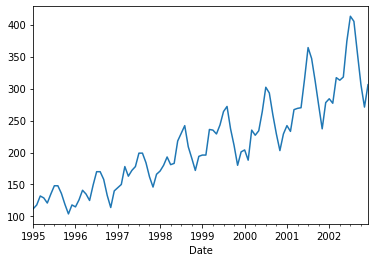

In [ ]:
airline_counts.plot()
plt.show()

Let's do log transformation to convert the TS to stationary TS

In [ ]:
airline_log = np.log10(airline_counts)

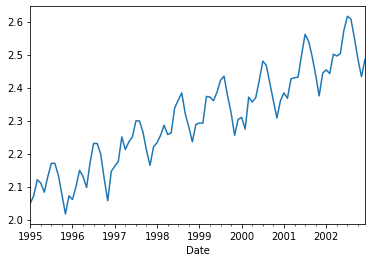

In [ ]:
airline_log.plot()
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(airline_log)
adfuller_results = pd.Series(adfuller(airline_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(airline_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


The p-value is still greater than 0.05 (Coinfidence Interval 95%). The log transformation has made variance stationary but mean is still increasing. Let's try differencing by 1.

In [ ]:
diff1 = airline_counts.diff(1)
diff1.head()

Date
1995-01-01     NaN
1995-02-01     6.0
1995-03-01    14.0
1995-04-01    -3.0
1995-05-01    -8.0
Name: Passengers, dtype: float64

In [ ]:
diff1.dropna(axis=0,inplace=True)
diff1.head()

Date
1995-02-01     6.0
1995-03-01    14.0
1995-04-01    -3.0
1995-05-01    -8.0
1995-06-01    14.0
Name: Passengers, dtype: float64

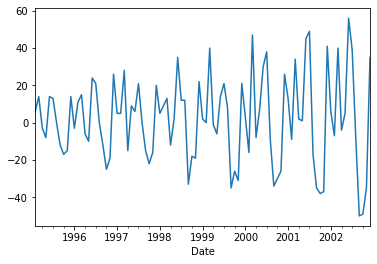

In [ ]:
diff1.plot()
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.150002
p-value                    0.224889
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


The p-value is still greater than 0.05 (Coinfidence Interval 95%).

The differencing by 1 has made mean stationary but variance is changing.

Let's try differencing by 1 on the log transformation.

In [ ]:
log_diff1 = airline_log.diff(1)
log_diff1.head()

Date
1995-01-01         NaN
1995-02-01    0.022664
1995-03-01    0.048692
1995-04-01   -0.009984
1995-05-01   -0.027804
Name: Passengers, dtype: float64

In [ ]:
log_diff1.dropna(axis=0,inplace=True)

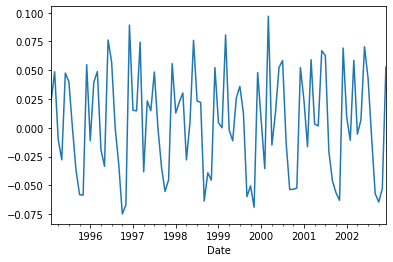

In [ ]:
log_diff1.plot()
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


p-value is still greateer than 0.05.

In [ ]:
log_diff2 = airline_log.diff(2)
log_diff2.head()

Date
1995-01-01         NaN
1995-02-01         NaN
1995-03-01    0.071356
1995-04-01    0.038708
1995-05-01   -0.037789
Name: Passengers, dtype: float64

In [ ]:
log_diff2.dropna(axis=0,inplace=True)

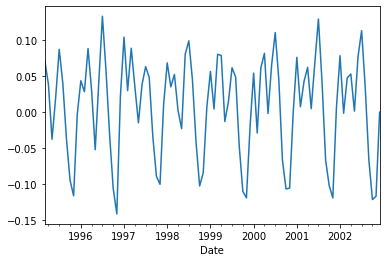

In [ ]:
log_diff2.plot()
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.787629
p-value                    0.060063
lags used                 11.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


p-value is still greateer than 0.05.

In [ ]:
log_diff3 = airline_log.diff(3)
log_diff3.head()

Date
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01    0.061372
1995-05-01    0.010903
Name: Passengers, dtype: float64

In [ ]:
log_diff3.dropna(axis=0,inplace=True)

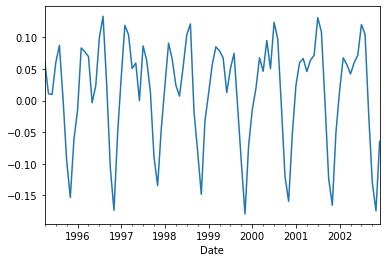

In [ ]:
log_diff3.plot()
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff3)
adfuller_results = pd.Series(adfuller(log_diff3)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff3)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.330692
p-value                    0.162260
lags used                 12.000000
Number of observations    80.000000
Critical Value (1%)       -3.514869
Critical Value (5%)       -2.898409
Critical Value (10%)      -2.586439
dtype: float64


p-value is still greateer than 0.05.

In [ ]:
log_diff4 = airline_log.diff(4)
log_diff4.head()

Date
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01    0.033567
Name: Passengers, dtype: float64

In [ ]:
log_diff4.dropna(axis=0,inplace=True)

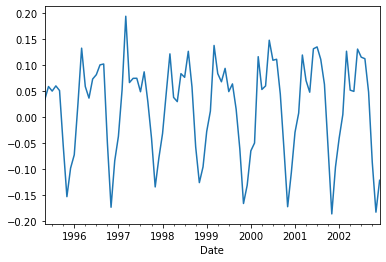

In [ ]:
log_diff4.plot()
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff4)
adfuller_results = pd.Series(adfuller(log_diff4)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff4)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.803122
p-value                    0.057829
lags used                  9.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


p-value is still greateer than 0.05.

In [ ]:
log_diff5 = airline_log.diff(5)
log_diff5.head()

Date
1995-01-01   NaN
1995-02-01   NaN
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
Name: Passengers, dtype: float64

In [ ]:
log_diff5.dropna(axis=0,inplace=True)

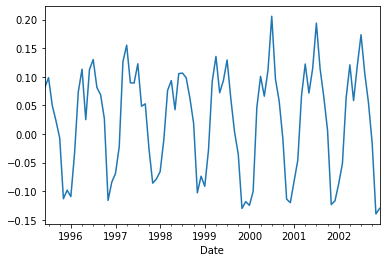

In [ ]:
log_diff5.plot()
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff5)
adfuller_results = pd.Series(adfuller(log_diff5)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff5)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.443736
p-value                    0.129771
lags used                 12.000000
Number of observations    78.000000
Critical Value (1%)       -3.517114
Critical Value (5%)       -2.899375
Critical Value (10%)      -2.586955
dtype: float64


p-value is still greateer than 0.05.

In [ ]:
log_diff6 = airline_log.diff(6)
log_diff6.head()

Date
1995-01-01   NaN
1995-02-01   NaN
1995-03-01   NaN
1995-04-01   NaN
1995-05-01   NaN
Name: Passengers, dtype: float64

In [ ]:
log_diff6.dropna(axis=0,inplace=True)


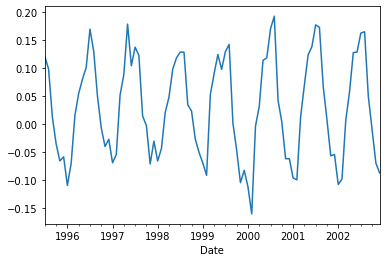

In [ ]:
log_diff6.plot()
plt.show()

In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff6)
adfuller_results = pd.Series(adfuller(log_diff6)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff6)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.892158
p-value                    0.046268
lags used                  7.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


p-value is less than 0.05. In this case we reject null hypothesis that TS is non stationary.

**Iterate the process to find the best values for p, d, q and P, D, Q**

In [ ]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [ ]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,3)
P = Q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

**Predict sales on in-sample date using the best fit ARIMA model**

In [ ]:
sarima = sm.tsa.statespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
sarima_results = sarima.fit()

In [ ]:
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 205.571
Date:                            Sun, 25 Dec 2022   AIC                           -401.141
Time:                                    09:47:10   BIC                           -389.231
Sample:                                03-01-1995   HQIC                          -396.366
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3153      0.118     -2.675      0.007      -0.546      -0.084
ma.L1          1.0001     68.356   

In [ ]:
airline_counts.tail(15)

Date
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
2002-03-01    317
2002-04-01    313
2002-05-01    318
2002-06-01    374
2002-07-01    413
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, dtype: int64

In [ ]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('2001-10-01'),full_results=True)

In [ ]:
prediction.predicted_mean

2001-10-01   -0.103272
2001-11-01   -0.107569
2001-12-01   -0.009606
2002-01-01    0.080055
2002-02-01   -0.001550
2002-03-01    0.060672
2002-04-01    0.051056
2002-05-01   -0.002669
2002-06-01    0.057612
2002-07-01    0.119254
2002-08-01    0.037002
2002-09-01   -0.056051
2002-10-01   -0.109977
2002-11-01   -0.117696
2002-12-01    0.003465
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
predicted_values = np.power(10,prediction.predicted_mean)

In [ ]:
predicted_values

2001-10-01    0.788367
2001-11-01    0.780605
2001-12-01    0.978124
2002-01-01    1.202417
2002-02-01    0.996436
2002-03-01    1.149930
2002-04-01    1.124750
2002-05-01    0.993874
2002-06-01    1.141857
2002-07-01    1.315995
2002-08-01    1.088935
2002-09-01    0.878920
2002-10-01    0.776288
2002-11-01    0.762613
2002-12-01    1.008010
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
actual = airline_counts['2001-10-01':]

In [ ]:
actual

Date
2001-10-01    274
2001-11-01    237
2001-12-01    278
2002-01-01    284
2002-02-01    277
2002-03-01    317
2002-04-01    313
2002-05-01    318
2002-06-01    374
2002-07-01    413
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, dtype: int64

In [ ]:
# mean absolute percentage error
mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

0.9968055966437416

In [ ]:
# mean square error
mse = np.mean((actual - predicted_values) ** 2)
mse

101141.38382514434

# **Forecast sales using the best fit ARIMA model**
The next step is to foercast passengers for next 3 years i.e. for 2002, 2003, and 2004 through the above model.

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
pred_ci_99.head()

,lower Passengers,upper Passengers
2003-01-01,0.034232,0.102568
2003-02-01,-0.038557,0.043510
2003-03-01,0.012592,0.095900
2003-04-01,0.015625,0.099045
2003-05-01,-0.045399,0.038027


In [ ]:
pred_ci_95.head()

,lower Passengers,upper Passengers
2003-01-01,0.034232,0.102568
2003-02-01,-0.038557,0.043510
2003-03-01,0.012592,0.095900
2003-04-01,0.015625,0.099045
2003-05-01,-0.045399,0.038027


In [ ]:

n_steps = 36
idx = pd.date_range(airline_counts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]),
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]),
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [ ]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2002-12-01,1.170578,1.082012,1.266392
2003-01-01,1.005719,0.915047,1.105376
2003-02-01,1.133042,1.029419,1.247096
2003-03-01,1.141129,1.036632,1.256160
2003-04-01,0.991549,0.900743,1.091509


In [ ]:
fc_99.head()

,lower_ci_99,upper_ci_99
2002-12-01,1.082012,1.266392
2003-01-01,0.915047,1.105376
2003-02-01,1.029419,1.247096
2003-03-01,1.036632,1.256160
2003-04-01,0.900743,1.091509


In [ ]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2002-12-01,1.170578,1.082012,1.266392,1.082012,1.266392
2003-01-01,1.005719,0.915047,1.105376,0.915047,1.105376
2003-02-01,1.133042,1.029419,1.247096,1.029419,1.247096
2003-03-01,1.141129,1.036632,1.256160,1.036632,1.256160
2003-04-01,0.991549,0.900743,1.091509,0.900743,1.091509


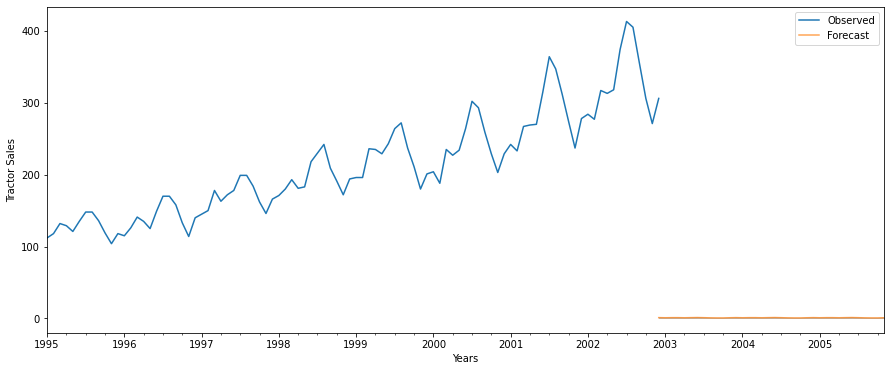

In [ ]:
# plot the forecast along with the confidence band
axis = airline_counts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

**Diagnostics**
1. Errors follows normality
2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

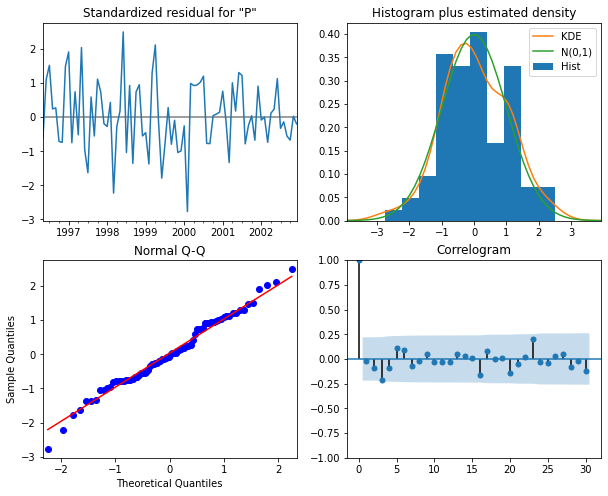

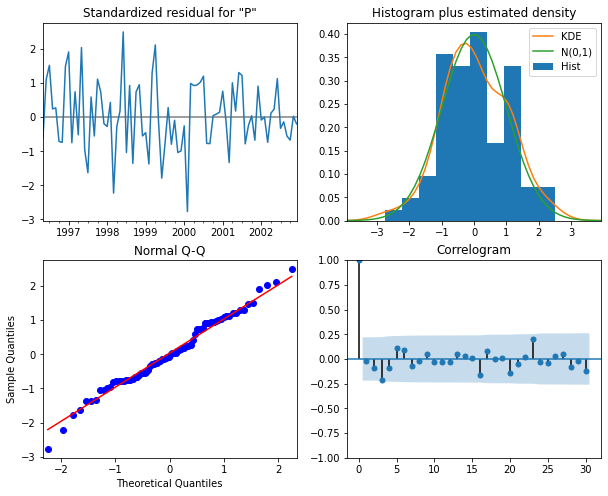

In [ ]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))

1)The KDE plot of the residuals on the top right is almost similar with the normal distribution.

2)The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

3)The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.